In [1]:
import pandas as pd
import os
import numpy as np
import datetime

from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pymongo import MongoClient

In [3]:
import csv

txt_file = r"jan_temp_new.txt"
csv_file = r"januarycsv.csv"

# use 'with' if the program isn't going to immediately terminate
# so you don't leave files open
# the 'b' is necessary on Windows
# it prevents \x1a, Ctrl-z, from ending the stream prematurely
# and also stops Python converting to / from different line terminators
# On other platforms, it has no effect
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

In [ ]:
import pandas as pd
import os
import numpy as np
import datetime

from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pymongo import MongoClient

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)


client=MongoClient('10.129.23.41:27017')
db=client.data
DF = pd.DataFrame()
for flat_name in db.collection_names():
    if flat_name[:7] == 'aravali':
        flat = db[flat_name]
        print(flat_name)
    else:
        continue
    tdf = np.abs(pd.DataFrame(list(flat.find({},{'_id':0,'TS':1,'FwdWh':1}))))
#     print(tdf)
    if 'TS' in tdf:
        tdf = tdf.set_index(['TS'])

        tdf.index = pd.to_datetime(tdf.index, unit='s')
        tdf = tdf['FwdWh'].resample('D').mean()
    #     print(flat_name)
    #     print(tdf)


        DF[flat_name] = (tdf.shift(-1) - tdf)/1000
#     print(DF[flat_name[:-3]])
#     break





print(DF)
# DF=DF.drop(DF.index[[10]])
# DF=DF.drop(DF.index[[30]])

   
# print(DF)



# # print(DF) 

# # plt.plot(sumcon)

# temp = pd.read_csv('novembercsv.csv')
# # temp = temp.drop(temp.index[[29]])
# print(temp)
# sc = list(sumcon)

# temp['con'] = sc
# plt.plot(temp)
# temp.corr().to_csv("November.csv")
# temp.to_csv('november.csv')
# print(temp.corr())
# # sumcon['temp'] = temp['tempavg']
# # sumcon['humid'] = temp['humidavg']

# print(temp)

aravali_241


0     174.622945
1     252.823811
2     217.978537
3     221.248797
4     190.018723
5     180.380775
6     168.312923
7     109.410048
8     273.763894
9     123.781165
10    185.414008
11    177.825420
12    172.699932
13    223.250034
14    167.758410
15    199.917341
16      0.000000
17      0.000000
18      0.000000
19     83.926368
20    382.502353
21    144.638214
22    226.915389
23    128.468485
24    221.646827
25    246.339851
26    226.077852
27    225.145905
28    137.157866
29      0.000000
         ...    
47    187.970495
48    166.295887
49    159.229618
50    190.359482
51    220.271328
52    192.674896
53    214.139606
54    210.002934
55    185.025959
56    133.120256
57      0.000000
58      0.000000
59      0.000000
60      0.000000
61      0.000000
62      0.000000
63    624.638795
64      0.959050
65    118.212112
66    627.334057
67      0.000000
68      0.000000
69      0.000000
70      0.000000
71    167.053298
72    645.885805
73    398.139400
74    272.6263

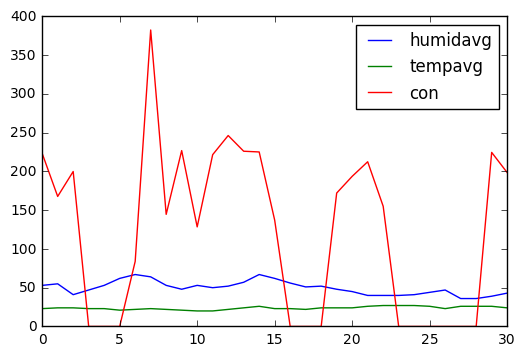

In [3]:
# print(DF.head())
# DF.to_csv("new_mongo_aravali.csv")
DF = pd.read_csv("new_mongo_aravali.csv")
# print(DF)
# # del DF['aravali_3']
# DF = DF.drop('aravali_3', 1)
# # del DF['aravali_208']
# del DF['aravali_234']
# # del DF['aravali_11']
# del DF['aravali_238']
# # del DF['aravali_22']
# # del DF['aravali_212']
# del DF['aravali_10']
# del DF['aravali_233']
# del DF['aravali_224']
# del DF['aravali_1']
# del DF['aravali_247']
# DF[DF < 0] = 0
# DF = DF.replace([np.inf, -np.inf], np.nan)
DF.round(2)
sumcon = DF.sum(axis=1) 
print(sumcon)
temp = pd.read_csv('januarycsv.csv')

# # temp = temp.drop(temp.index[[29]])
# print(temp)
sc = list(sumcon)
print(temp.shape)
print(len(sc))
print("max = ", max(sc[13:44]) , min(list(filter((0.0).__ne__, sc[13:44]))))

temp['con'] = sc[13:44]
temp.plot()
# plt.show()
plt.savefig('Jan.png')
temp.corr().to_csv("January.csv")
temp.to_csv('january.csv')
print(temp.corr())